# Image Transformations on Effexor photos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import PIL
from PIL import Image

import skimage.transform
import skimage.util

In [2]:
# Drugs I am using are Plavix, Effexor, Venlafaxine, Artorvastin, Metformin, Lysinopril

# Location of image
# I CHANGED THIS WITH EACH UNIQUE PHOTO
IMG_PATH = "images/nanas_pills/Effexor/Effexor_2.png"

(222, 222, 3)
First channel:
[[138 138 138 ... 138 138 138]
 [138 138 138 ... 138 138 138]
 [138 138 138 ... 138 138 138]
 ...
 [138 138 138 ... 138 138 138]
 [138 138 138 ... 138 138 138]
 [138 138 138 ... 138 138 138]]


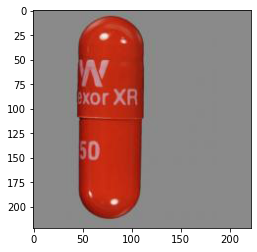

In [3]:
SEED = 42
random.seed(SEED)

### Load image as Numpy array

# Open image
img = PIL.Image.open(IMG_PATH)

# Convert the image to a Numpy array, optionally invert, and append to X
img = np.asarray(img)

### Get height and width of image
height = img.shape[0]
width = img.shape[1]
### View the image

# Print part of image
print(img.shape)
print("First channel:")
print(img[:,:,0])

# Display image from array
plt.imshow(img, vmin=0, vmax=255)

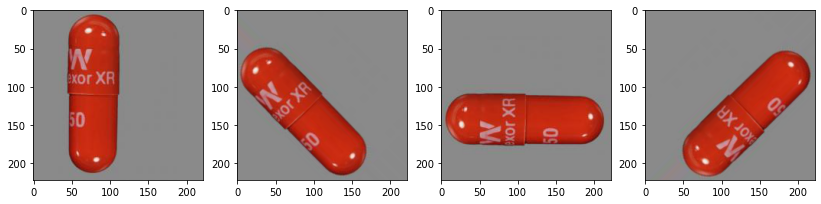

In [4]:
### Rotate

# Create 3 rotations at the 45, 90, 135. Note that rotate() normalizes values, so we need to keep
# them in the 0..255 integer range.
rot_1 = skimage.transform.rotate(img, angle=45, mode='edge', preserve_range=True).astype(np.uint8)
rot_2 = skimage.transform.rotate(img, angle=90, mode='edge', preserve_range=True).astype(np.uint8)
rot_3 = skimage.transform.rotate(img, angle=135, mode='edge', preserve_range=True).astype(np.uint8)

# Show the original and the transforms
figs, axs = plt.subplots(1, 4, figsize=(14, 14))
axs[0].imshow(img, vmin=0, vmax=255)
axs[1].imshow(rot_1, vmin=0, vmax=255)
axs[2].imshow(rot_2, vmin=0, vmax=255)
axs[3].imshow(rot_3, vmin=0, vmax=255)

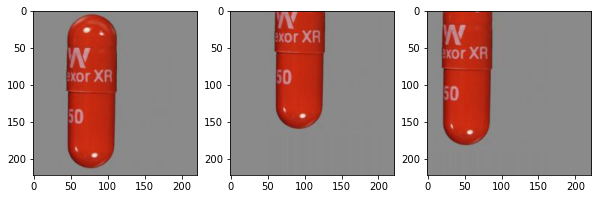

In [5]:
### Translation

# Choose random amount to translate (up to 1/4 image width, height) in either direction
tr_y = round((0.5 - random.random()) * (height / 2))
tr_x = round((0.5 - random.random()) * (width / 2))

# Perform translation to create new image
translation = skimage.transform.AffineTransform(translation=(tr_y, tr_x))
tr_1 = skimage.transform.warp(img, translation, mode='edge', preserve_range=True)
tr_1 = tr_1.astype(np.uint8)

# Choose a new random amount to translate (up to 1/4 image width, height) in either direction
tr_y = round((0.5 - random.random()) * (height / 2))
tr_x = round((0.5 - random.random()) * (width / 2))

# Perform translation to create new image
translation = skimage.transform.AffineTransform(translation=(tr_y, tr_x))
tr_2 = skimage.transform.warp(img, translation, mode='edge', preserve_range=True)
tr_2 = tr_2.astype(np.uint8)

# Show the original and the transforms
figs, axs = plt.subplots(1, 3, figsize=(10, 10))
axs[0].imshow(img, vmin=0, vmax=255)
axs[1].imshow(tr_1, vmin=0, vmax=255)
axs[2].imshow(tr_2, vmin=0, vmax=255)

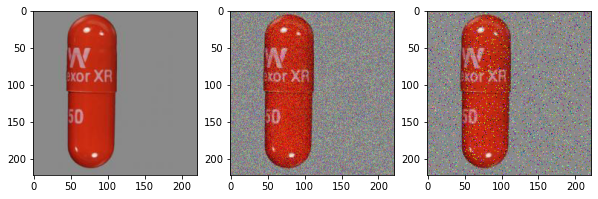

In [6]:
### Noise

# Add random Gaussian noise
noise_1 = skimage.util.random_noise(img, mode='gaussian', seed=SEED)
noise_1 = (noise_1 * 255).astype(np.uint8)

# Add random "salt and pepper" noise
noise_2 = skimage.util.random_noise(img, mode='s&p', seed=SEED)
noise_2 = (noise_2 * 255).astype(np.uint8)

# Show the original and the transforms
figs, axs = plt.subplots(1, 3, figsize=(10, 10))
axs[0].imshow(img, vmin=0, vmax=255)
axs[1].imshow(noise_1, vmin=0, vmax=255)
axs[2].imshow(noise_2, vmin=0, vmax=255)

In [7]:
# Save these 7 new images
# to this location= "C:\Users\hp\Documents\Data Science\Pill_ID\images\nanas_pills\Effexor"
# rot_1, rot_2, rot_3
# tr_1, tr_2
# noise_1, noise_2
# I think I have to turn array back to a png image
# We used sci kit learn to manipulate all
# I CHANGED THIS FOR EACH UNIQUE PLAVIX PHOTO

#save each image
im = Image.fromarray(rot_1)
im.save("images/nanas_pills/Effexor/Effexor_2_1.png")

im = Image.fromarray(rot_2)
im.save("images/nanas_pills/Effexor/Effexor_2_2.png")

im = Image.fromarray(rot_3)
im.save("images/nanas_pills/Effexor/Effexor_2_3.png")

im = Image.fromarray(tr_1)
im.save("images/nanas_pills/Effexor/Effexor_2_4.png")

im = Image.fromarray(tr_2)
im.save("images/nanas_pills/Effexor/Effexor_2_5.png")

im = Image.fromarray(noise_1)
im.save("images/nanas_pills/Effexor/Effexor_2_6.png")

im = Image.fromarray(noise_2)
im.save("images/nanas_pills/Effexor/Effexor_2_7.png")